In [27]:
#Data 
import numpy as np
import scipy
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression


from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
import xgboost

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

import shap


plt.rcParams['font.weight'] = 'normal'
plt.rcParams['text.usetex']=True
plt.rcParams['font.family']='stixgeneral'
plt.rcParams['mathtext.fontset']='stix'
plt.rcParams['font.size'] = 15
plt.rcParams['figure.facecolor'] = 'white'

In [2]:
h=0.6774


z_list=[20.05, 14.99, 11.98, 10.98, 10.00, 9.39, 9.00, 8.45, 8.01, 7.60, 7.24, 7.01, 6.49, 6.01, 5.85, 5.53, 5.23, 5.00, 4.66, 4.43, 4.18, 4.01, 3.71, 3.49, 3.28, 3.01, 2.90, 2.73, 2.58, 2.44,\
   2.32, 2.21, 2.10, 2.00, 1.90, 1.82, 1.74, 1.67, 1.60, 1.53, 1.50, 1.41, 1.36, 1.30, 1.25, 1.21, 1.15, 1.11, 1.07, 1.04, 1.00, 0.95, 0.92, 0.89, 0.85, 0.82, 0.79, 0.76, 0.73, 0.70, 0.68,\
   0.64, 0.62, 0.60, 0.58, 0.55, 0.52, 0.50, 0.48, 0.46, 0.44, 0.42, 0.40, 0.38, 0.36, 0.35, 0.33, 0.31, 0.30, 0.27, 0.26, 0.24, 0.23, 0.21, 0.20, 0.18, 0.17, 0.15, 0.14, 0.13, 0.11, 0.10,
   0.08, 0.07, 0.06, 0.05, 0.03, 0.02, 0.01, 0.00]
t_list=[0.129, 0.271, 0.370, 0.418, 0.475, 0.517, 0.547, 0.596, 0.640, 0.687, 0.732, 0.764, 0.844, 0.932, 0.965, 1.036, 1.112, 1.177, 1.282, 1.366, 1.466, 1.540, 1.689, 1.812, 1.944, 2.145,\
   2.238, 2.384, 2.539, 2.686, 2.839, 2.981, 3.129, 3.285, 3.447, 3.593, 3.744, 3.902, 4.038, 4.206, 4.293, 4.502, 4.657, 4.816, 4.980, 5.115, 5.289, 5.431, 5.577, 5.726, 5.878, 6.073,\
   6.193, 6.356, 6.522, 6.692, 6.822, 6.998, 7.132, 7.314, 7.453, 7.642, 7.786, 7.932, 8.079, 8.280, 8.432, 8.587, 8.743, 8.902, 9.062, 9.225, 9.389, 9.556, 9.724, 9.837, 10.009, 10.182,\
   10.299, 10.535, 10.654, 10.834, 11.016, 11.138, 11.323, 11.509, 11.635, 11.824, 11.951, 12.143, 12.337, 12.467, 12.663, 12.795, 12.993, 13.127, 13.328, 13.463, 13.667, 13.803]

In [41]:
snap=99 # 99 (z=0), 67 (z=0.5), 50 (z=1), 40 (z=1.5), 33 (z=2)

df=pd.read_csv("./data/halodata_tng100-1_{}th.csv".format(snap))
print(z_list[snap], df.shape, df.keys())

df=df.rename(columns={"TotalMass": "SubhaloMass", 
                   "GasMass": "SubhaloMassType0", 
                   "DMMass": "SubhaloMassType1", 
                   "StarMass": "SubhaloMassType4",
                   "spin_x": "SubhaloSpin_x",
                   "spin_y": "SubhaloSpin_y",
                   "spin_z": "SubhaloSpin_z",
                   "Vmax": "SubhaloVmax",
                   "VmaxRad": "SubhaloVmaxRad",
                   "StarZ": "SubhaloStarMetallicity",
                   "GasZ": "SubhaloGasMetallicity",
                   "SFR": "SubhaloSFR",
                   "BHMass": "SubhaloBHMass",
                  }, errors="raise")

df.keys()

0.0 (36934, 23) Index(['TotalMass', 'GasMass', 'DMMass', 'StarMass', 'x', 'y', 'z', 'vx', 'vy',
       'vz', 'spin_x', 'spin_y', 'spin_z', 'Vmax', 'VmaxRad', 'GasRhalf',
       'DMRhalf', 'StarRhalf', 'StarZ', 'GasZ', 'SFR', 'BHMass', 'BHMDot'],
      dtype='object')


Index(['SubhaloMass', 'SubhaloMassType0', 'SubhaloMassType1',
       'SubhaloMassType4', 'x', 'y', 'z', 'vx', 'vy', 'vz', 'SubhaloSpin_x',
       'SubhaloSpin_y', 'SubhaloSpin_z', 'SubhaloVmax', 'SubhaloVmaxRad',
       'GasRhalf', 'DMRhalf', 'StarRhalf', 'SubhaloStarMetallicity',
       'SubhaloGasMetallicity', 'SubhaloSFR', 'SubhaloBHMass', 'BHMDot'],
      dtype='object')

In [42]:
features = ['SubhaloMass', 'SubhaloSpin_x', 'SubhaloSpin_y', 'SubhaloSpin_z',
            'SubhaloVmax', 'SubhaloVmaxRad', 'SubhaloStarMetallicity',
            'SubhaloGasMetallicity', 'SubhaloSFR', 'SubhaloMassType0' ,'SubhaloMassType1', 'SubhaloMassType4', 'SubhaloBHMass']

df=df[features]

print(df.shape)



t = (np.array(df['SubhaloSpin_x'])**2 + np.array(df['SubhaloSpin_y'])**2 + np.array(df['SubhaloSpin_z'])**2)**0.5
df.insert(12, "SubhaloSpin", t, False)

t = np.log10(df['SubhaloMass'])
df.insert(13, "logSubhaloMass", t, False)

t = np.log10(df['SubhaloMassType0'] + 1e-100)
df.insert(14, "logSubhaloMassType0", t, False)

t = np.log10(df['SubhaloMassType1'])
df.insert(15, "logSubhaloMassType1", t, False)

t = np.log10(df['SubhaloMassType4'] + 1e-100)
df.insert(16, "logSubhaloMassType4", t, False)

t = np.log10(df['SubhaloSpin'])
df.insert(17, "logSubhaloSpin", t, False)

t = np.log10(df['SubhaloVmax'])
df.insert(18, "logSubhaloVmax", t, False)

t = np.log10(df['SubhaloVmaxRad'])
df.insert(19, "logSubhaloVmaxRad", t, False)

t = np.log10(df['SubhaloStarMetallicity'] + 1e-100)
df.insert(20, "logSubhaloStarMetallicity", t, False)

t = np.log10(df['SubhaloGasMetallicity'] + 1e-100)
df.insert(21, "logSubhaloGasMetallicity", t, False)

t = np.log10(df['SubhaloSFR'] + 1e-100)
df.insert(22, "logSubhaloSFR", t, False)

t = np.log10(df['SubhaloBHMass'] + 1e-100)
df.insert(23, "logSubhaloBHMass", t, False)


#df.to_csv("./halodata_tng100-1_{}th_logadded.csv".format(snap))

print(df.keys())

(36934, 13)
Index(['SubhaloMass', 'SubhaloSpin_x', 'SubhaloSpin_y', 'SubhaloSpin_z',
       'SubhaloVmax', 'SubhaloVmaxRad', 'SubhaloStarMetallicity',
       'SubhaloGasMetallicity', 'SubhaloSFR', 'SubhaloMassType0',
       'SubhaloMassType1', 'SubhaloMassType4', 'SubhaloSpin', 'logSubhaloMass',
       'logSubhaloMassType0', 'logSubhaloMassType1', 'logSubhaloMassType4',
       'logSubhaloSpin', 'logSubhaloVmax', 'logSubhaloVmaxRad',
       'logSubhaloStarMetallicity', 'logSubhaloGasMetallicity',
       'logSubhaloSFR', 'logSubhaloBHMass', 'SubhaloBHMass'],
      dtype='object')


In [4]:
snap=99 # t

df=pd.read_csv("halodata_tng100-1_{}th_logadded.csv".format(snap))
print(df.head())

   Unnamed: 0   SubhaloMass  SubhaloSpin_x  SubhaloSpin_y  SubhaloSpin_z  \
0           0  3.426532e+14   17827.031000    -9711.52500  -86143.390000   
1           1  3.817858e+12       3.161532    -1284.12560     -55.649998   
2           2  1.555080e+12    -404.193600     -385.10773    -185.667900   
3           3  3.353876e+12   -5055.941000     1125.21740   -4782.486000   
4           4  1.126141e+12      49.114685     -815.04974      28.764950   

   SubhaloVmax  SubhaloVmaxRad  SubhaloStarMetallicity  SubhaloGasMetallicity  \
0    983.83560      914.630300                0.022085               0.005708   
1    778.19700        0.015424                0.034399               0.032599   
2    506.30710        0.031323                0.031236               0.000000   
3    252.31793        2.113104                0.023198               0.008547   
4    272.40270        3.581063                0.024363               0.031679   

   SubhaloSFR  ...  logSubhaloMassType1  logSubhaloMassT

# 1. Multivariate linear regression
# 2. Decide relative importance
# 3. Iterate for different redshift
# 4. Literature search

In [52]:
snap=99 # 99 (z=0), 67 (z=0.5), 50 (z=1), 40 (z=1.5), 33 (z=2)

df=pd.read_csv("halodata_tng100-1_{}th_logadded.csv".format(snap))
print(df.shape, df.head())


# Assuming you have loaded your DataFrame as df

features = ['logSubhaloMassType0', 'logSubhaloMassType1', 'logSubhaloMassType4',
       'logSubhaloSpin', 'logSubhaloVmax', 'logSubhaloVmaxRad',
       'logSubhaloStarMetallicity', 'logSubhaloGasMetallicity',
       'logSubhaloSFR']
dependent_var = ['logSubhaloBHMass']


X = df[features]
y = df[dependent_var]


params = {
    "n_estimators": 100,
    "max_depth": 4,
    #"min_samples_split": 5
}


# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)


#forest_regressor = RandomForestRegressor(**params)
#forest_regressor.fit(X_train, y_train.values.ravel())
#y_pred_rf = forest_regressor.predict(X_test)


xgb_regressor = xgboost.XGBRegressor(**params)
xgb_regressor.fit(X_train, y_train)
y_pred_xgb = xgb_regressor.predict(X_test)

(36934, 26)    Unnamed: 0   SubhaloMass  SubhaloSpin_x  SubhaloSpin_y  SubhaloSpin_z  \
0           0  3.426532e+14   17827.031000    -9711.52500  -86143.390000   
1           1  3.817858e+12       3.161532    -1284.12560     -55.649998   
2           2  1.555080e+12    -404.193600     -385.10773    -185.667900   
3           3  3.353876e+12   -5055.941000     1125.21740   -4782.486000   
4           4  1.126141e+12      49.114685     -815.04974      28.764950   

   SubhaloVmax  SubhaloVmaxRad  SubhaloStarMetallicity  SubhaloGasMetallicity  \
0    983.83560      914.630300                0.022085               0.005708   
1    778.19700        0.015424                0.034399               0.032599   
2    506.30710        0.031323                0.031236               0.000000   
3    252.31793        2.113104                0.023198               0.008547   
4    272.40270        3.581063                0.024363               0.031679   

   SubhaloSFR  ...  logSubhaloMassType1  log

In [41]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import roc_auc_score
max_depths = np.arange(1,10)
mse = []
r2=[]
roc=[]
for i, max_depth in enumerate(max_depths):
    params = {
    "n_estimators": 100,
    "max_depth": max_depth,
    #"min_samples_split": 5
    }
    regressor = xgboost.XGBRegressor(**params)

    # Train the model
    regressor.fit(X_train, y_train.values.ravel()) 
    y_pred_test=regressor.predict(X_test)
    
    mse += [mean_squared_error(y_test, y_pred_test)]
    r2 +=[r2_score(y_test, y_pred_test)]

Text(0, 0.5, 'R2 score')

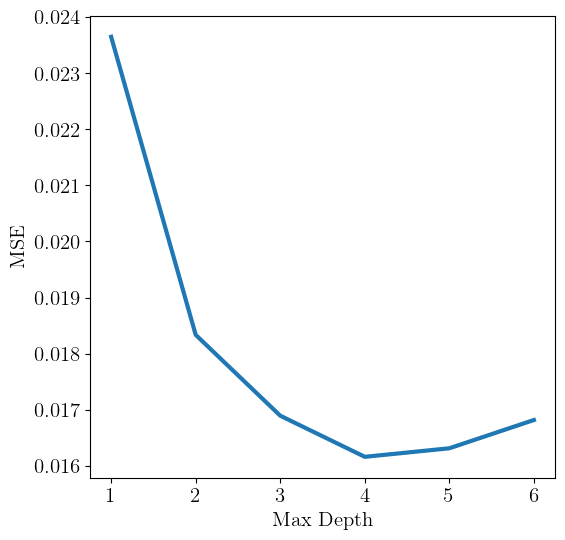

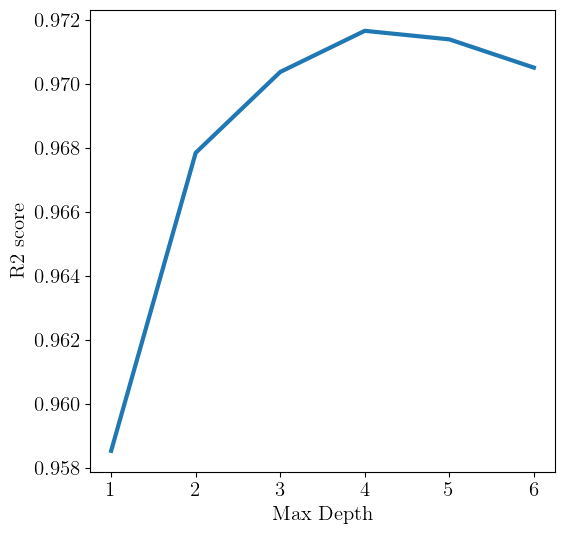

In [42]:
plt.figure(figsize=(6, 6))
plt.plot(max_depths, mse, lw=3)

plt.xlabel('Max Depth')
plt.ylabel('MSE')


plt.figure(figsize=(6, 6))
plt.plot(max_depths, r2, lw=3)

plt.xlabel('Max Depth')
plt.ylabel('R2 score')

In [49]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import roc_auc_score
max_depths = np.arange(10,30)
mse = []
r2=[]
roc=[]
for i, max_depth in enumerate(max_depths):
    params = {
    "n_estimators": 100,
    "max_depth": max_depth,
    #"min_samples_split": 5
    }
    regressor = RandomForestRegressor(**params)

    # Train the model
    regressor.fit(X_train, y_train.values.ravel()) 
    y_pred_test=regressor.predict(X_test)
    
    mse += [mean_squared_error(y_test, y_pred_test)]
    r2 +=[r2_score(y_test, y_pred_test)]

Text(0, 0.5, 'R2 score')

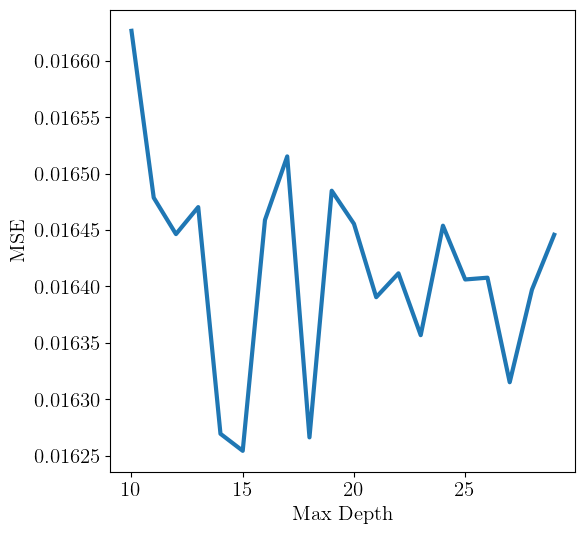

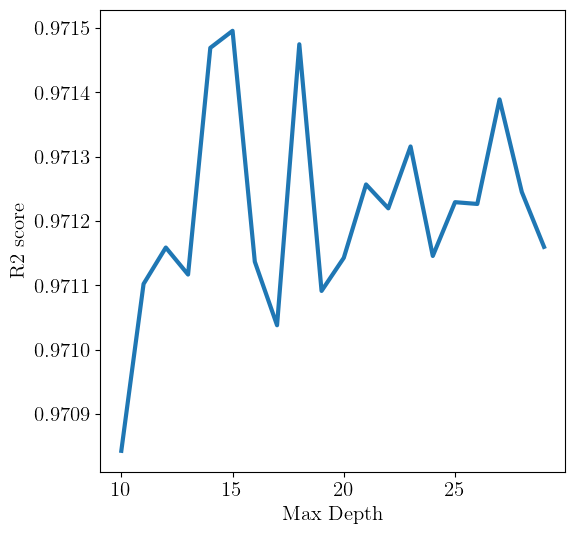

In [50]:
plt.figure(figsize=(6, 6))
plt.plot(max_depths, mse, lw=3)

plt.xlabel('Max Depth')
plt.ylabel('MSE')


plt.figure(figsize=(6, 6))
plt.plot(max_depths, r2, lw=3)

plt.xlabel('Max Depth')
plt.ylabel('R2 score')

/home/jhl1862/venv_yt4.0/lib/python3.7/site-packages/ipykernel_launcher.py:31: UserWarning: This figure was using constrained_layout, but that is incompatible with subplots_adjust and/or tight_layout; disabling constrained_layout.


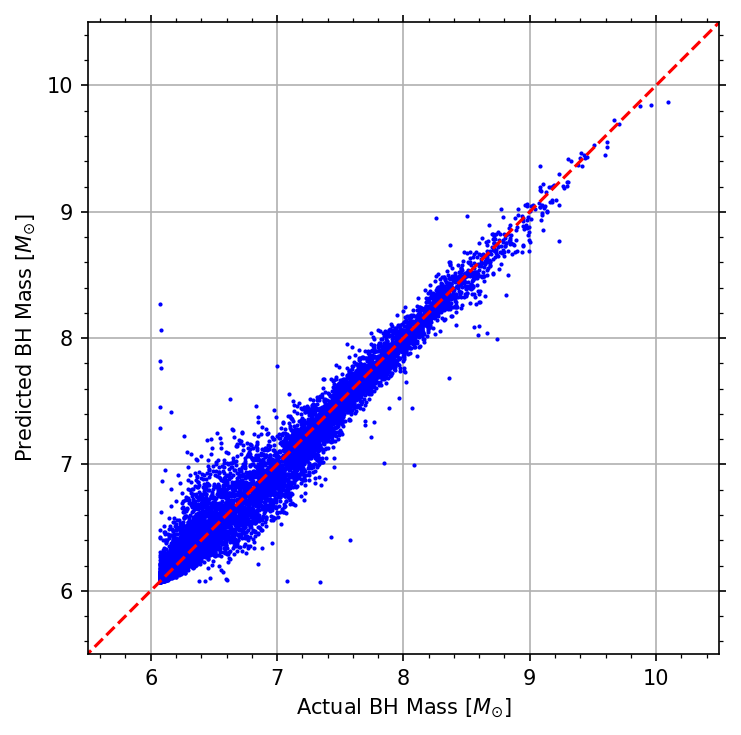

In [19]:
fig = plt.figure(figsize=(6,5), dpi=150, layout='constrained') # change dpi!

ax=fig.subplots(1,1)


ax.plot(y_test, y_pred_rf, 'b.', ms=2)

line=np.linspace(5, 11, 10)
ax.plot(line, line, 'r--')


#ax.legend(loc=2)

ax.minorticks_on()
ax.xaxis.set_ticks_position('both')
ax.yaxis.set_ticks_position('both')
ax.set_axisbelow(True)
ax.grid()

ax.set_xlim(5.5, 10.5)
ax.set_ylim(5.5, 10.5)

#ax.set_xscale('log')
#ax.set_yscale('log')

ax.set_xlabel(r'Actual BH Mass [$M_{\odot}$]')
ax.set_ylabel(r'Predicted BH Mass [$M_{\odot}$]')

ax.set_aspect('equal')

plt.tight_layout()

This figure was using constrained_layout, but that is incompatible with subplots_adjust and/or tight_layout; disabling constrained_layout.


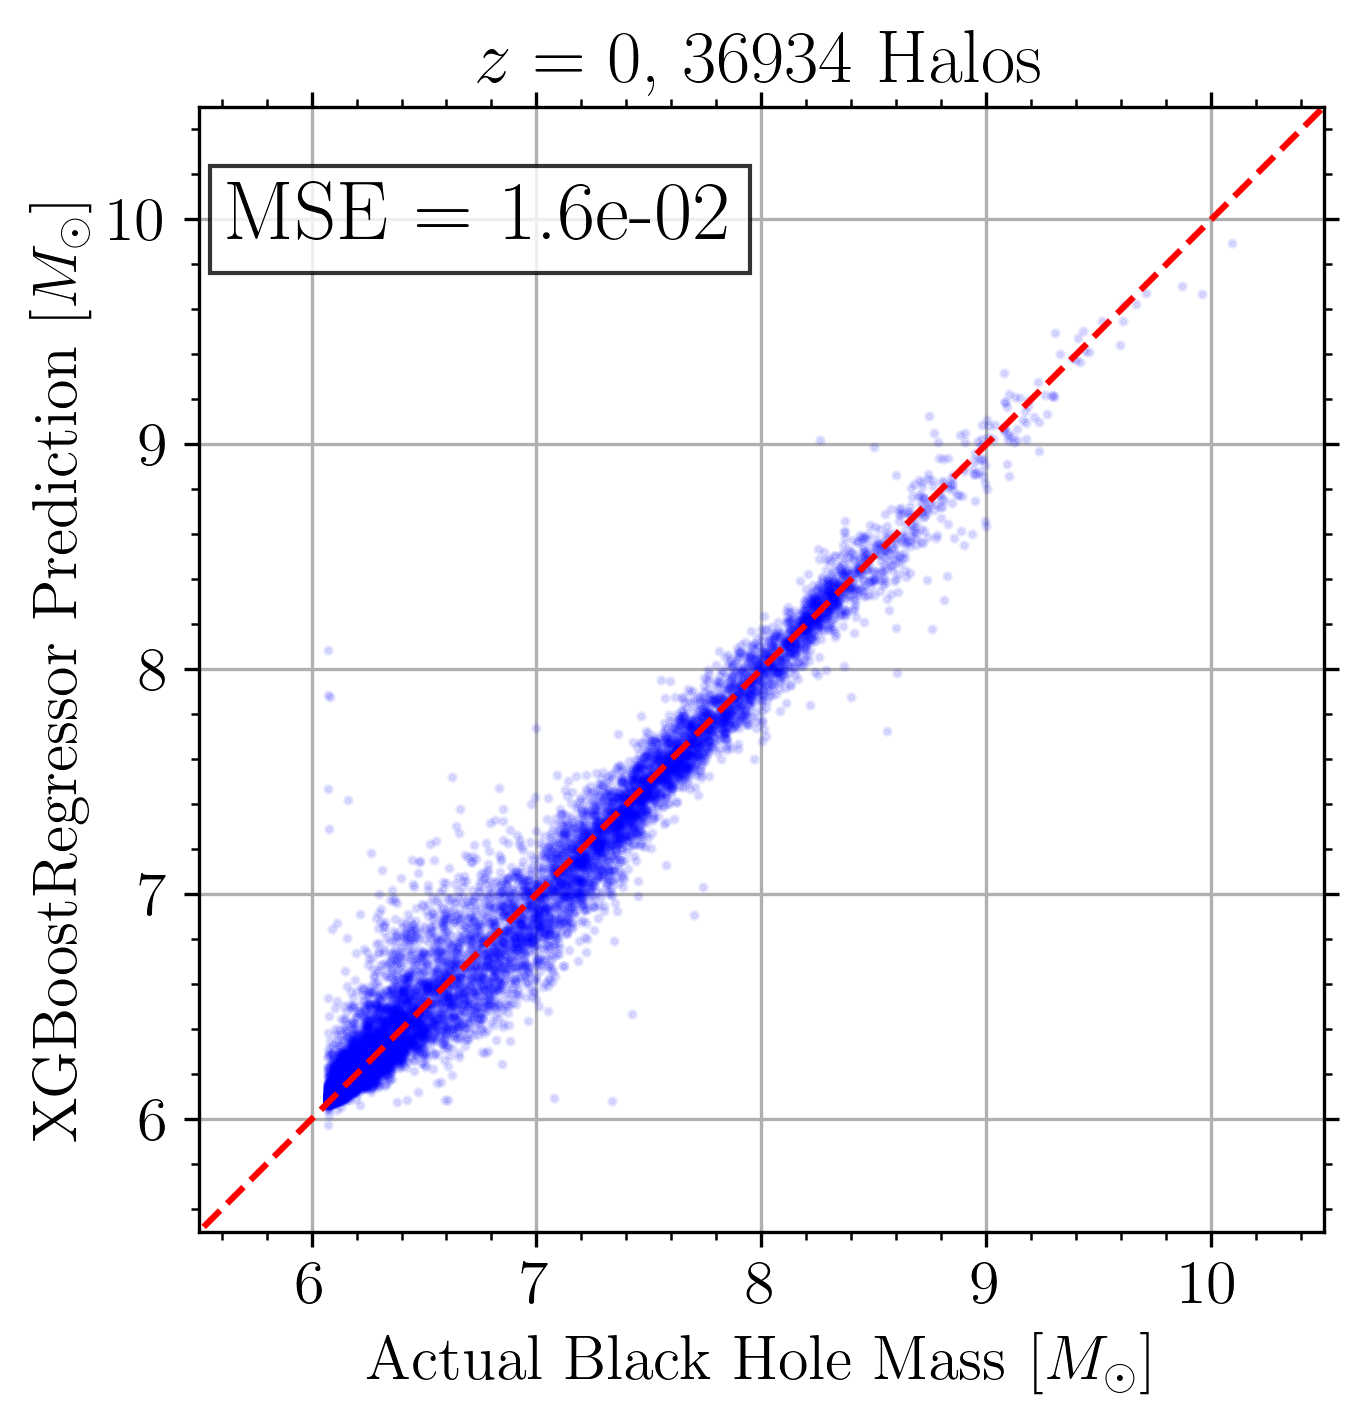

In [55]:
fig = plt.figure(figsize=(6,5), dpi=300, layout='constrained') # change dpi!

ax=fig.subplots(1,1)


ax.plot(y_test, y_pred_xgb, 'b.', ms=3, alpha=0.1)

line=np.linspace(5, 11, 10)
ax.plot(line, line, 'r--')


mse = mean_squared_error(y_test, y_pred_xgb)

box={'boxstyle':'square,pad=0.2', 'facecolor':'white', 'linewidth':1, 'edgecolor':'black', 'alpha':0.8}
ax.text(0.25, 0.9, 'MSE = {:.1e}'.format(mse), ha='center', va='center', transform=ax.transAxes, fontsize=20, bbox=box)


#ax.legend(loc=2)

ax.minorticks_on()
ax.xaxis.set_ticks_position('both')
ax.yaxis.set_ticks_position('both')
ax.set_axisbelow(True)
ax.grid()

ax.set_xlim(5.5, 10.5)
ax.set_ylim(5.5, 10.5)

#ax.set_xscale('log')
#ax.set_yscale('log')

ax.set_xlabel(r'Actual Black Hole Mass [$M_{\odot}$]')
ax.set_ylabel(r'XGBoostRegressor Prediction [$M_{\odot}$]')

ax.set_aspect('equal')

ax.set_title('$z=0$, 36934 Halos')


plt.tight_layout()

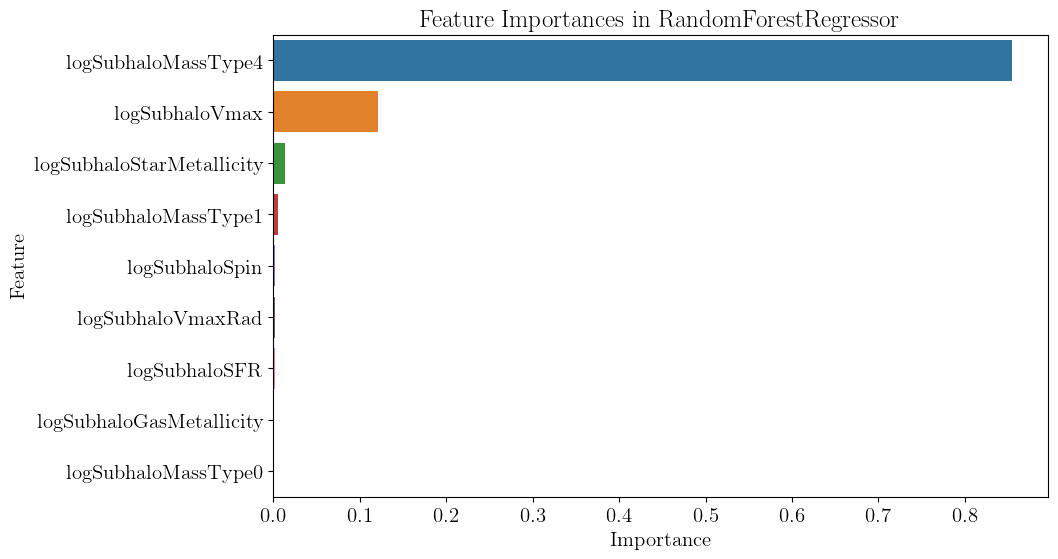

In [34]:
importances = forest_regressor.feature_importances_
feature_importances = dict(zip(features, importances))

# Convert to DataFrame for easier handling
importances_df = pd.DataFrame({'Feature': features, 'Importance': importances})
importances_df = importances_df.sort_values(by='Importance', ascending=False)

# Visualize feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importances_df)
plt.title('Feature Importances in RandomForestRegressor')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

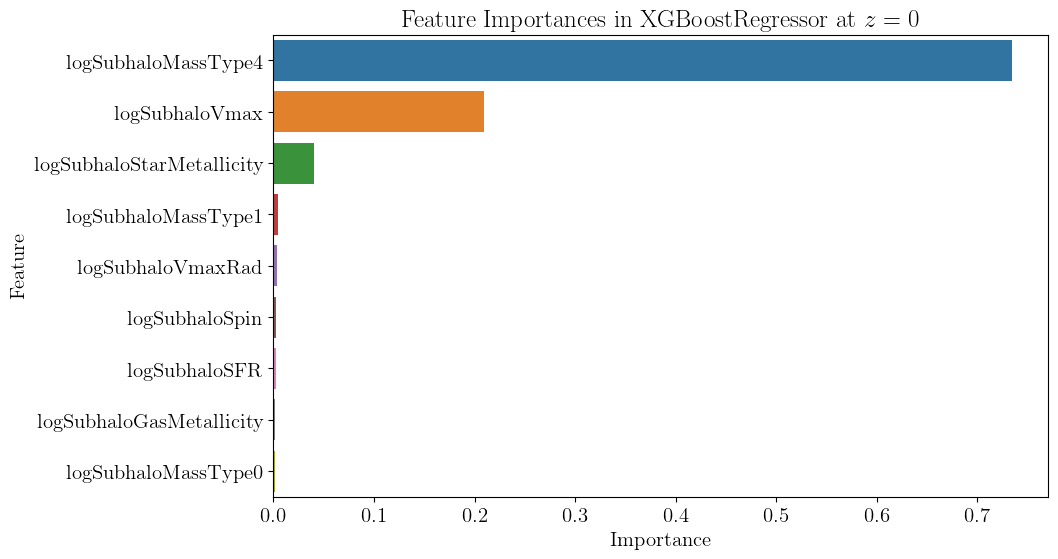

In [56]:
importances = xgb_regressor.feature_importances_
feature_importances = dict(zip(features, importances))

# Convert to DataFrame for easier handling
importances_df = pd.DataFrame({'Feature': features, 'Importance': importances})
importances_df = importances_df.sort_values(by='Importance', ascending=False)

# Visualize feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importances_df)
plt.title('Feature Importances in XGBoostRegressor at $z=0$')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
100%|===================| 12178/12189 [02:12<00:00]        

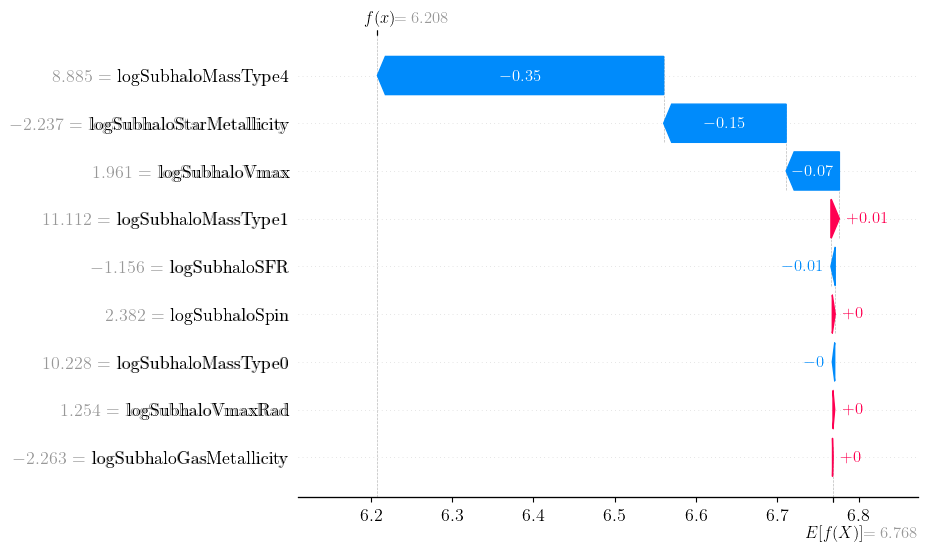

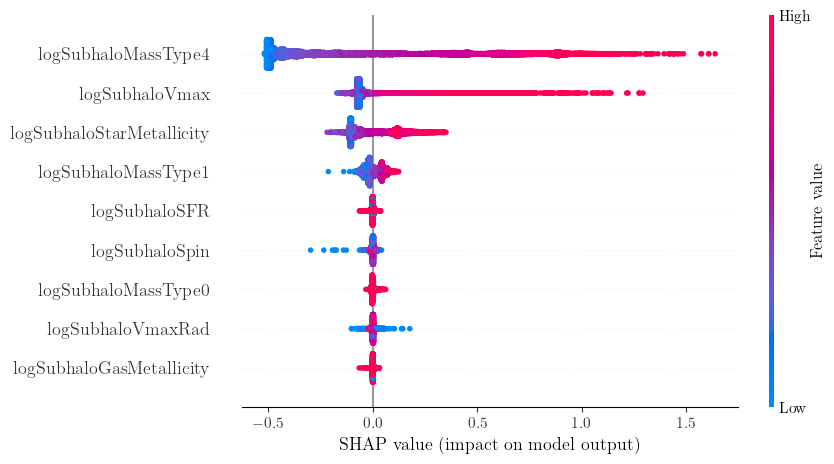

In [37]:
explainer = shap.Explainer(forest_regressor, X_train)
shap_values = explainer(X_test)
# Visualize the first prediction’s explanation
shap.plots.waterfall(shap_values[0])
shap.plots.beeswarm(shap_values)

100%|===================| 12171/12189 [01:23<00:00]        

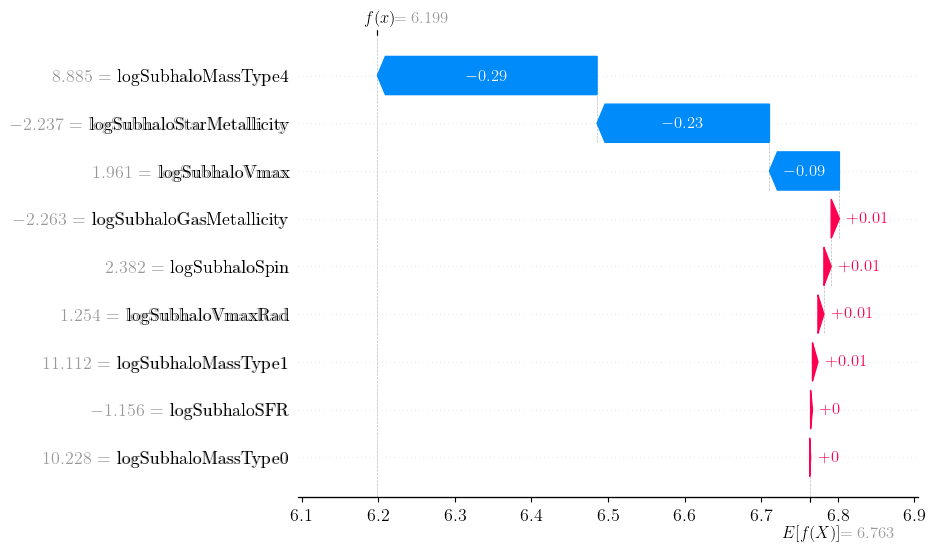

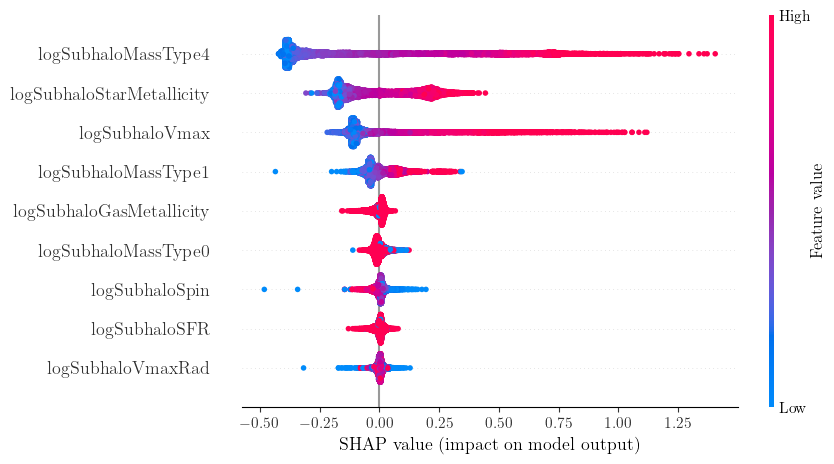

In [38]:
explainer = shap.Explainer(xgb_regressor, X_train)
shap_values = explainer(X_test)
# Visualize the first prediction’s explanation
shap.plots.waterfall(shap_values[0])
shap.plots.beeswarm(shap_values)

In [80]:
df=pd.read_csv("combined_halo_data_logadded.csv")


df_t=df[(df['Redshift']==0.0)]
df_t=df[(df['logSubhaloBHMass']>-100)]

print(df_t.shape)


# Assume you have independent variables X and a dependent variable y
features = ['logSubhaloMassType0', 'logSubhaloMassType1', 'logSubhaloMassType4',
       'logSubhaloSpin', 'logSubhaloVmax', 'logSubhaloVmaxRad',
       'logSubhaloStarMetallicity', 'logSubhaloGasMetallicity',
       'logSubhaloSFR']
dependent_var = ['logSubhaloBHMass']

X = df_t[features]
y = df_t[dependent_var]

 
# Create an instance of the LinearRegression class
reg = LinearRegression()
 
# Fit the model to the data
reg.fit(X, y)
 
# Print the coefficients of the model
print(reg.coef_, reg.intercept_)
print(reg.score(X, y))

(8281, 29)
[[ 3.32139110e-04  3.57290622e-01  7.25206262e-01 -1.00264608e-01
  -6.81908706e-02 -1.59539296e-01  3.78532784e-01 -6.82676233e-04
  -1.30953991e-03]] [-2.16832962]
0.9012179447739729
